<a href="https://colab.research.google.com/github/ahmetbekir22/wine-quality-prediction/blob/main/white_wine_analays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns


In [5]:
# Temel istatistiksel özet
import pandas as pd


wine_data = pd.read_csv('wine_quality_data/winequality-white.csv',delimiter=';')

stat_summary = wine_data.describe()
print(stat_summary)


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4914.000000       4914.000000  4914.000000     4914.000000   
mean        6.857662          0.278465     0.334300        6.389398   
std         0.846456          0.100984     0.120932        5.072124   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4914.000000          4914.000000           4914.000000  4914.000000   
mean      0.045792            35.292023            138.363044     0.994027   
std       0.022016            17.050433             42.688519     0.002992   
min       0.009000             2.000000         

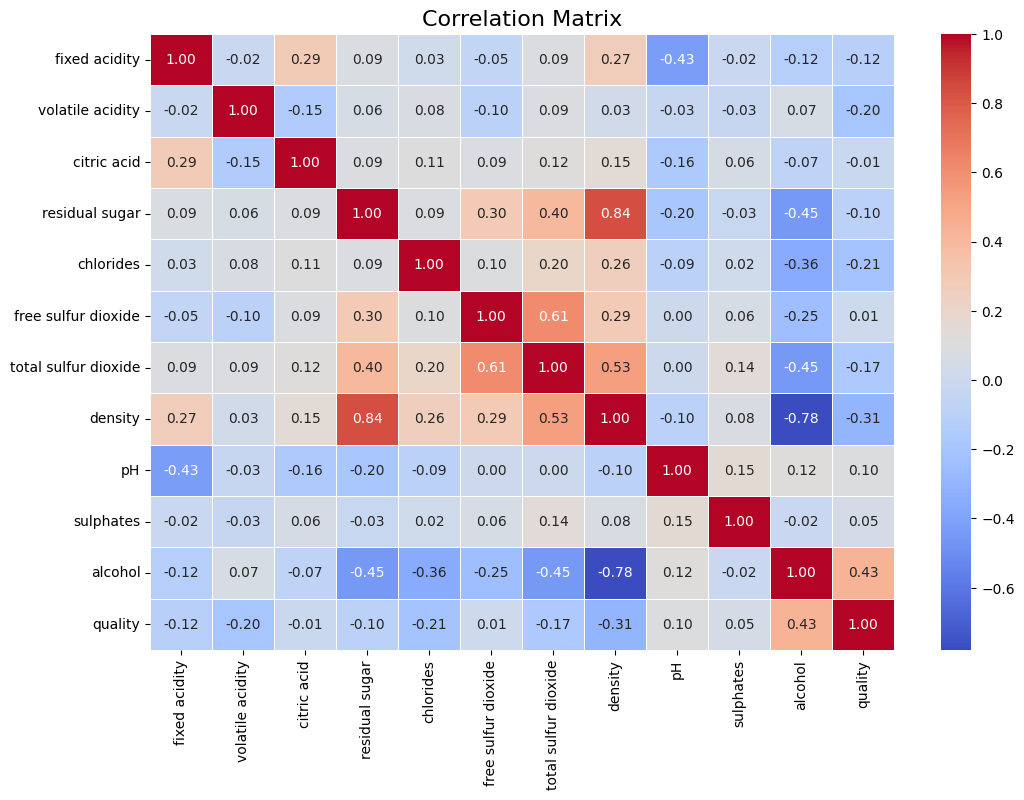

In [7]:
import seaborn as sns

# Korelasyon analizi
correlation_matrix = wine_data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


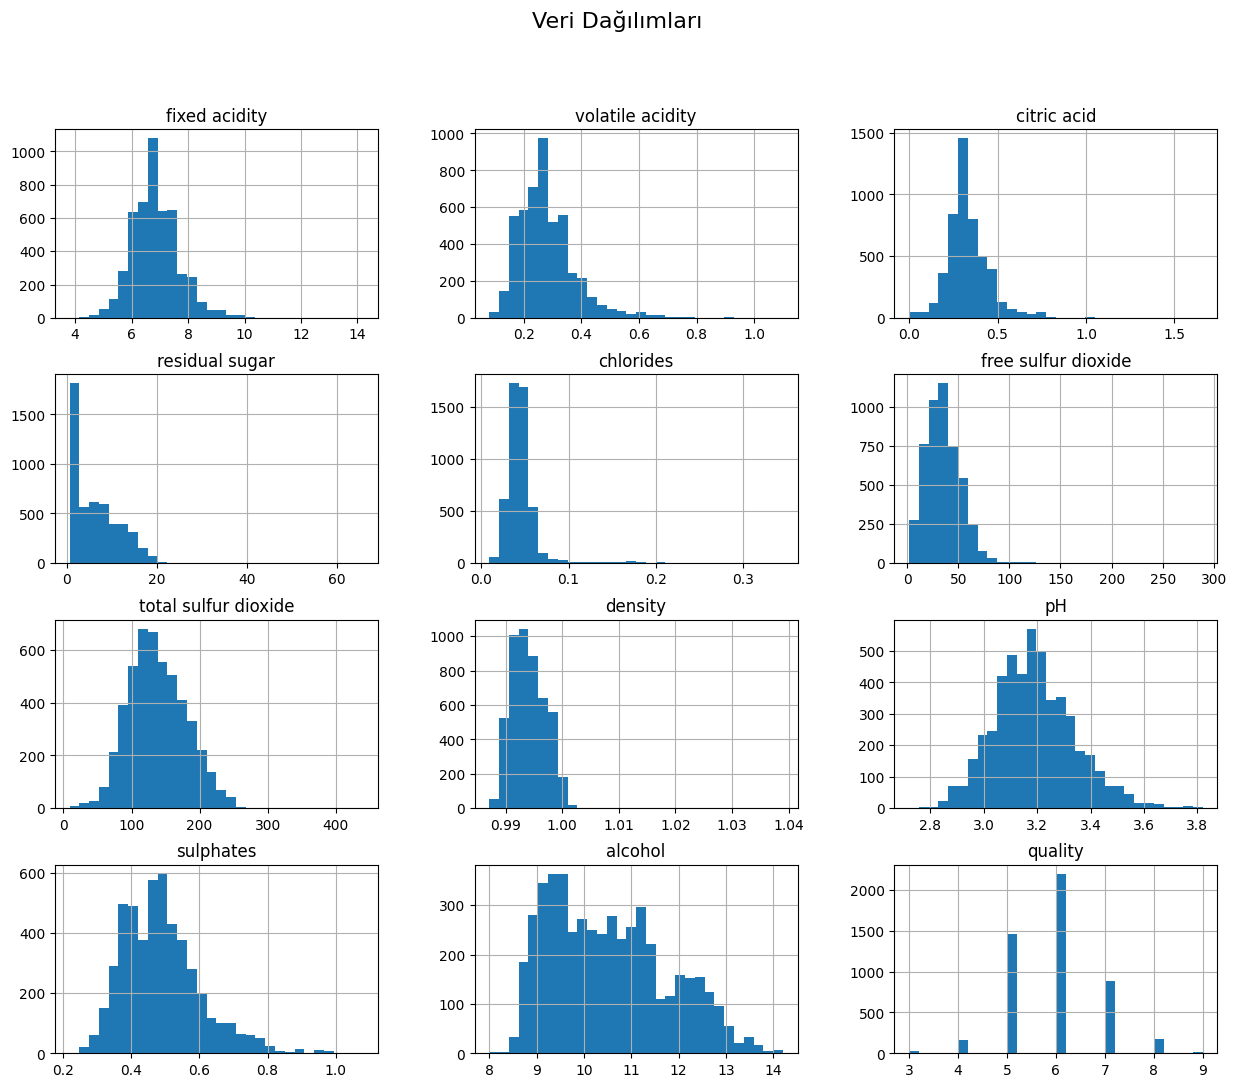

In [13]:
# Histogramlar
wine_data.hist(bins=30, figsize=(15, 12))
plt.suptitle('Veri Dağılımları', fontsize=16)
plt.show()


<Figure size 1500x1000 with 0 Axes>

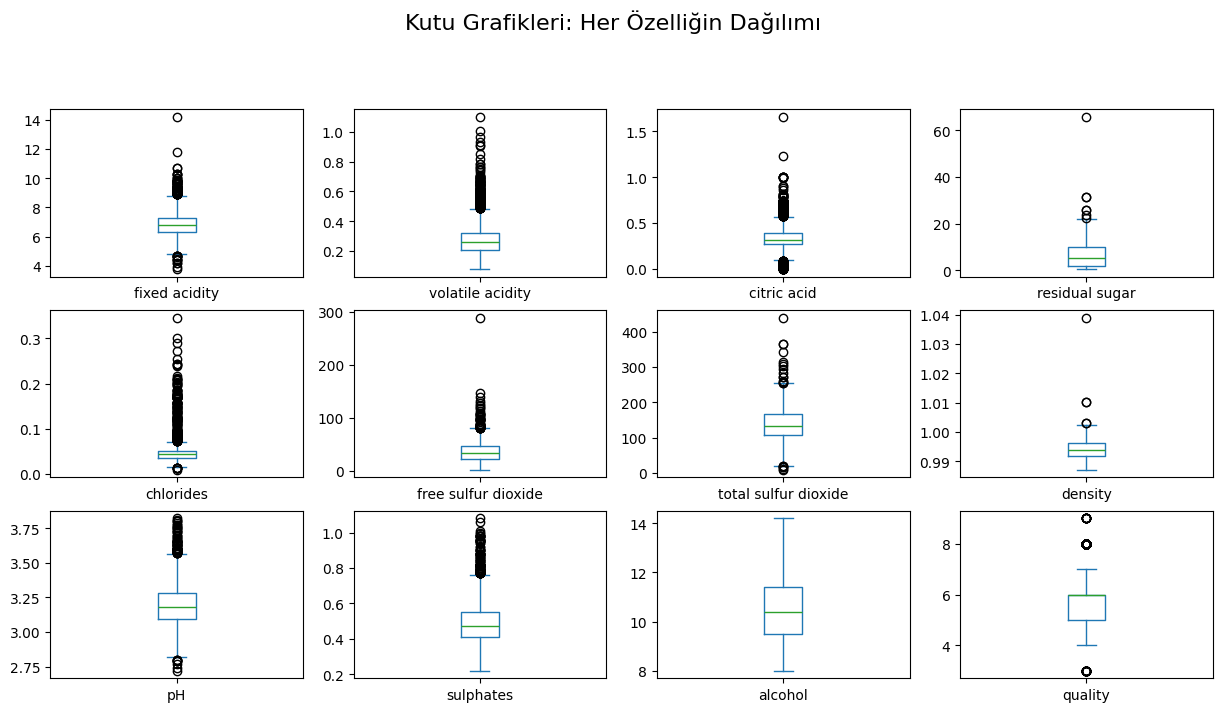

In [14]:
# Kutu grafikleri
plt.figure(figsize=(15, 10))
wine_data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle('Kutu Grafikleri: Her Özelliğin Dağılımı', fontsize=16)
plt.show()


<Figure size 1500x1000 with 0 Axes>

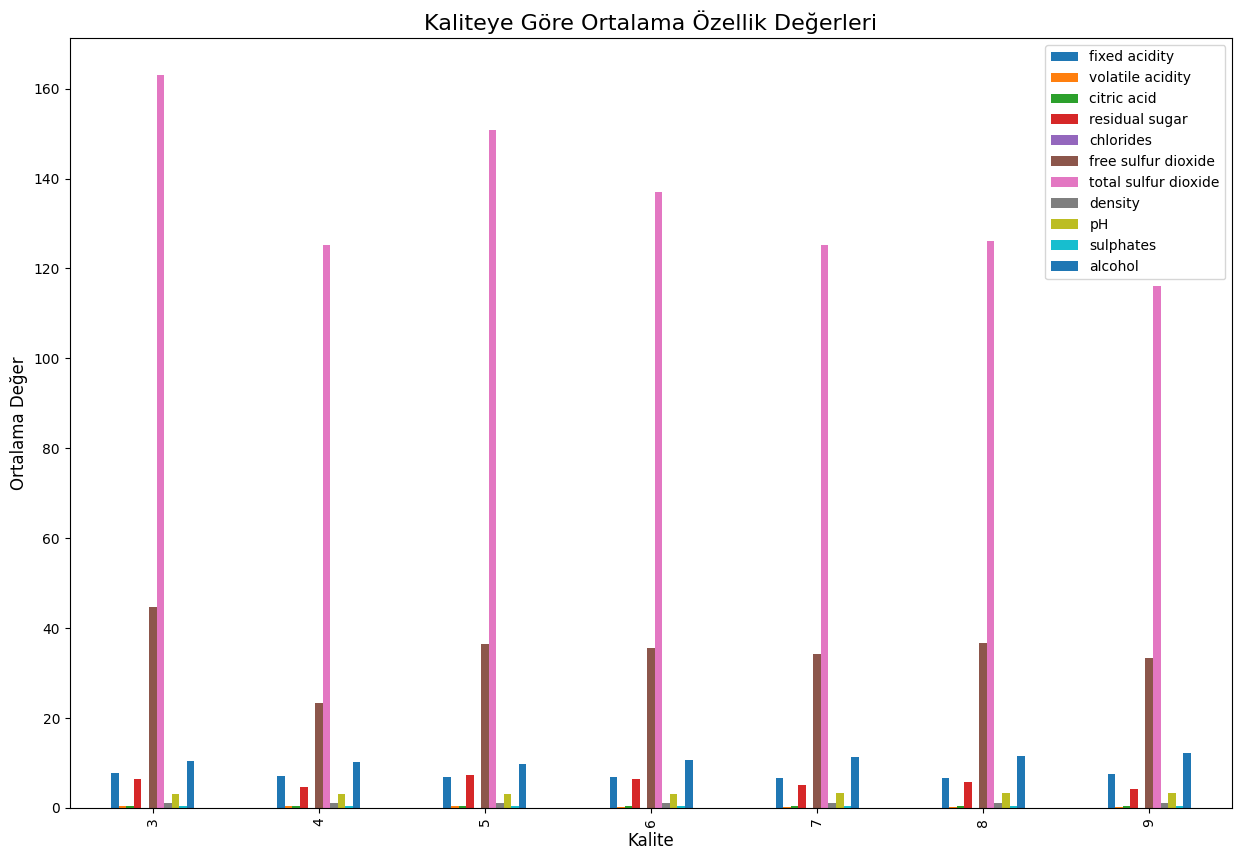

In [15]:
# Kaliteye göre her özelliğin dağılımını görmek
plt.figure(figsize=(15, 10))
wine_data.groupby('quality').mean().plot(kind='bar', figsize=(15, 10))
plt.title('Kaliteye Göre Ortalama Özellik Değerleri', fontsize=16)
plt.xlabel('Kalite', fontsize=12)
plt.ylabel('Ortalama Değer', fontsize=12)
plt.show()


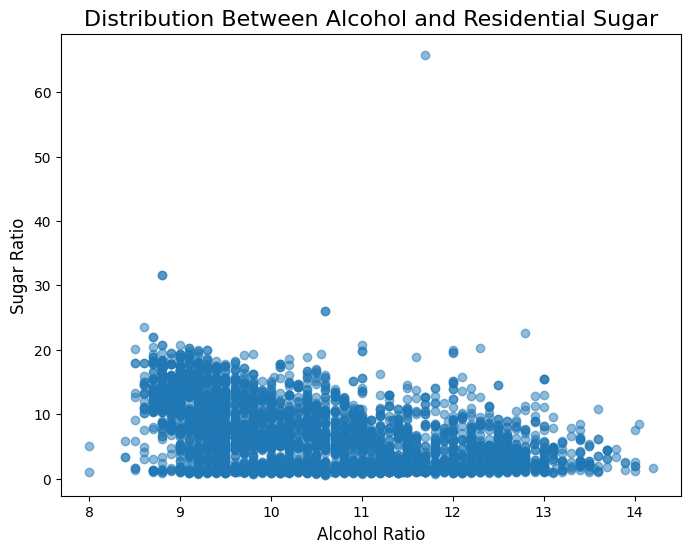

In [11]:
# Alkol ve şeker oranı arasındaki ilişkiyi görmek için dağılım grafiği
plt.figure(figsize=(8, 6))
plt.scatter(wine_data['alcohol'], wine_data['residual sugar'], alpha=0.5)
plt.title('Distribution Between Alcohol and Residential Sugar', fontsize=16)
plt.xlabel('Alcohol Ratio', fontsize=12)
plt.ylabel('Sugar Ratio', fontsize=12)
plt.show()


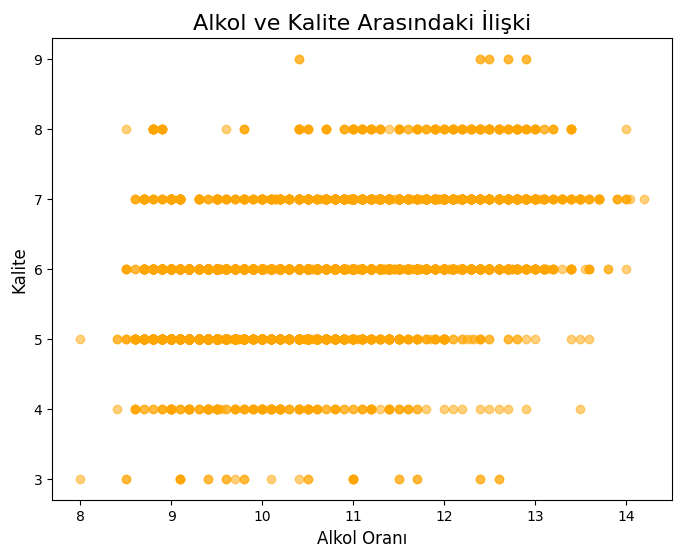

In [17]:
# Alkol ve kalite arasındaki ilişkiyi görmek için dağılım grafiği
plt.figure(figsize=(8, 6))
plt.scatter(wine_data['alcohol'], wine_data['quality'], alpha=0.5, color='orange')
plt.title('Alkol ve Kalite Arasındaki İlişki', fontsize=16)
plt.xlabel('Alkol Oranı', fontsize=12)
plt.ylabel('Kalite', fontsize=12)
plt.show()


In [1]:
# Boxplot for detecting outliers
plt.figure(figsize=(15, 10))
wine_data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle('Outliers Table')
plt.show()

# Z-score method to detect outliers
from scipy.stats import zscore
wine_data_zscore = wine_data.apply(zscore)
outliers = (wine_data_zscore.abs() > 3).sum()
print("Outliers per feature:", outliers)


NameError: name 'plt' is not defined

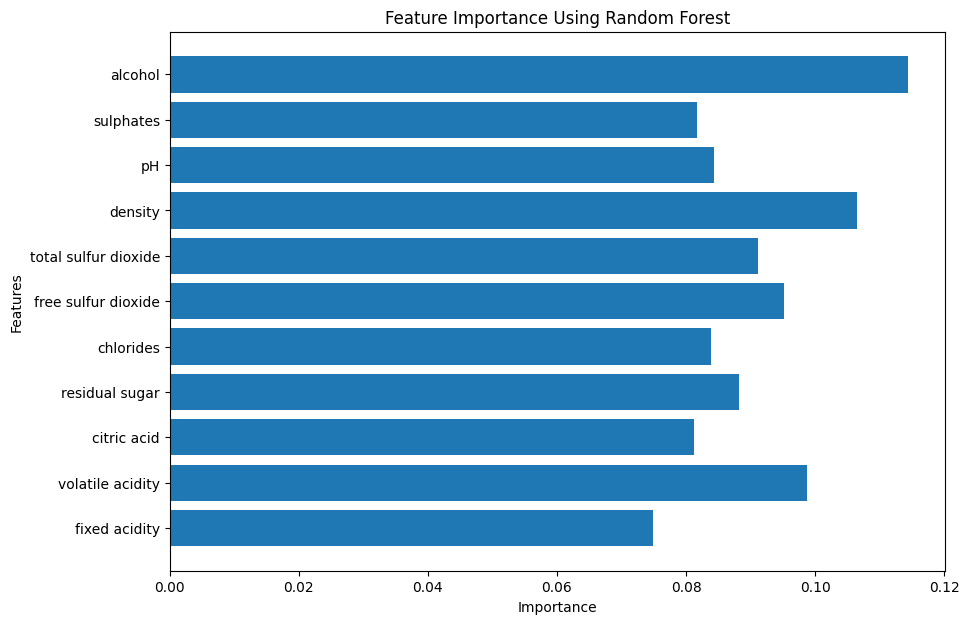

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Fit a RandomForestClassifier for feature importance
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot feature importance
plt.figure(figsize=(10, 7))
plt.barh(X.columns, rf.feature_importances_)
plt.title('Feature Importance Using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


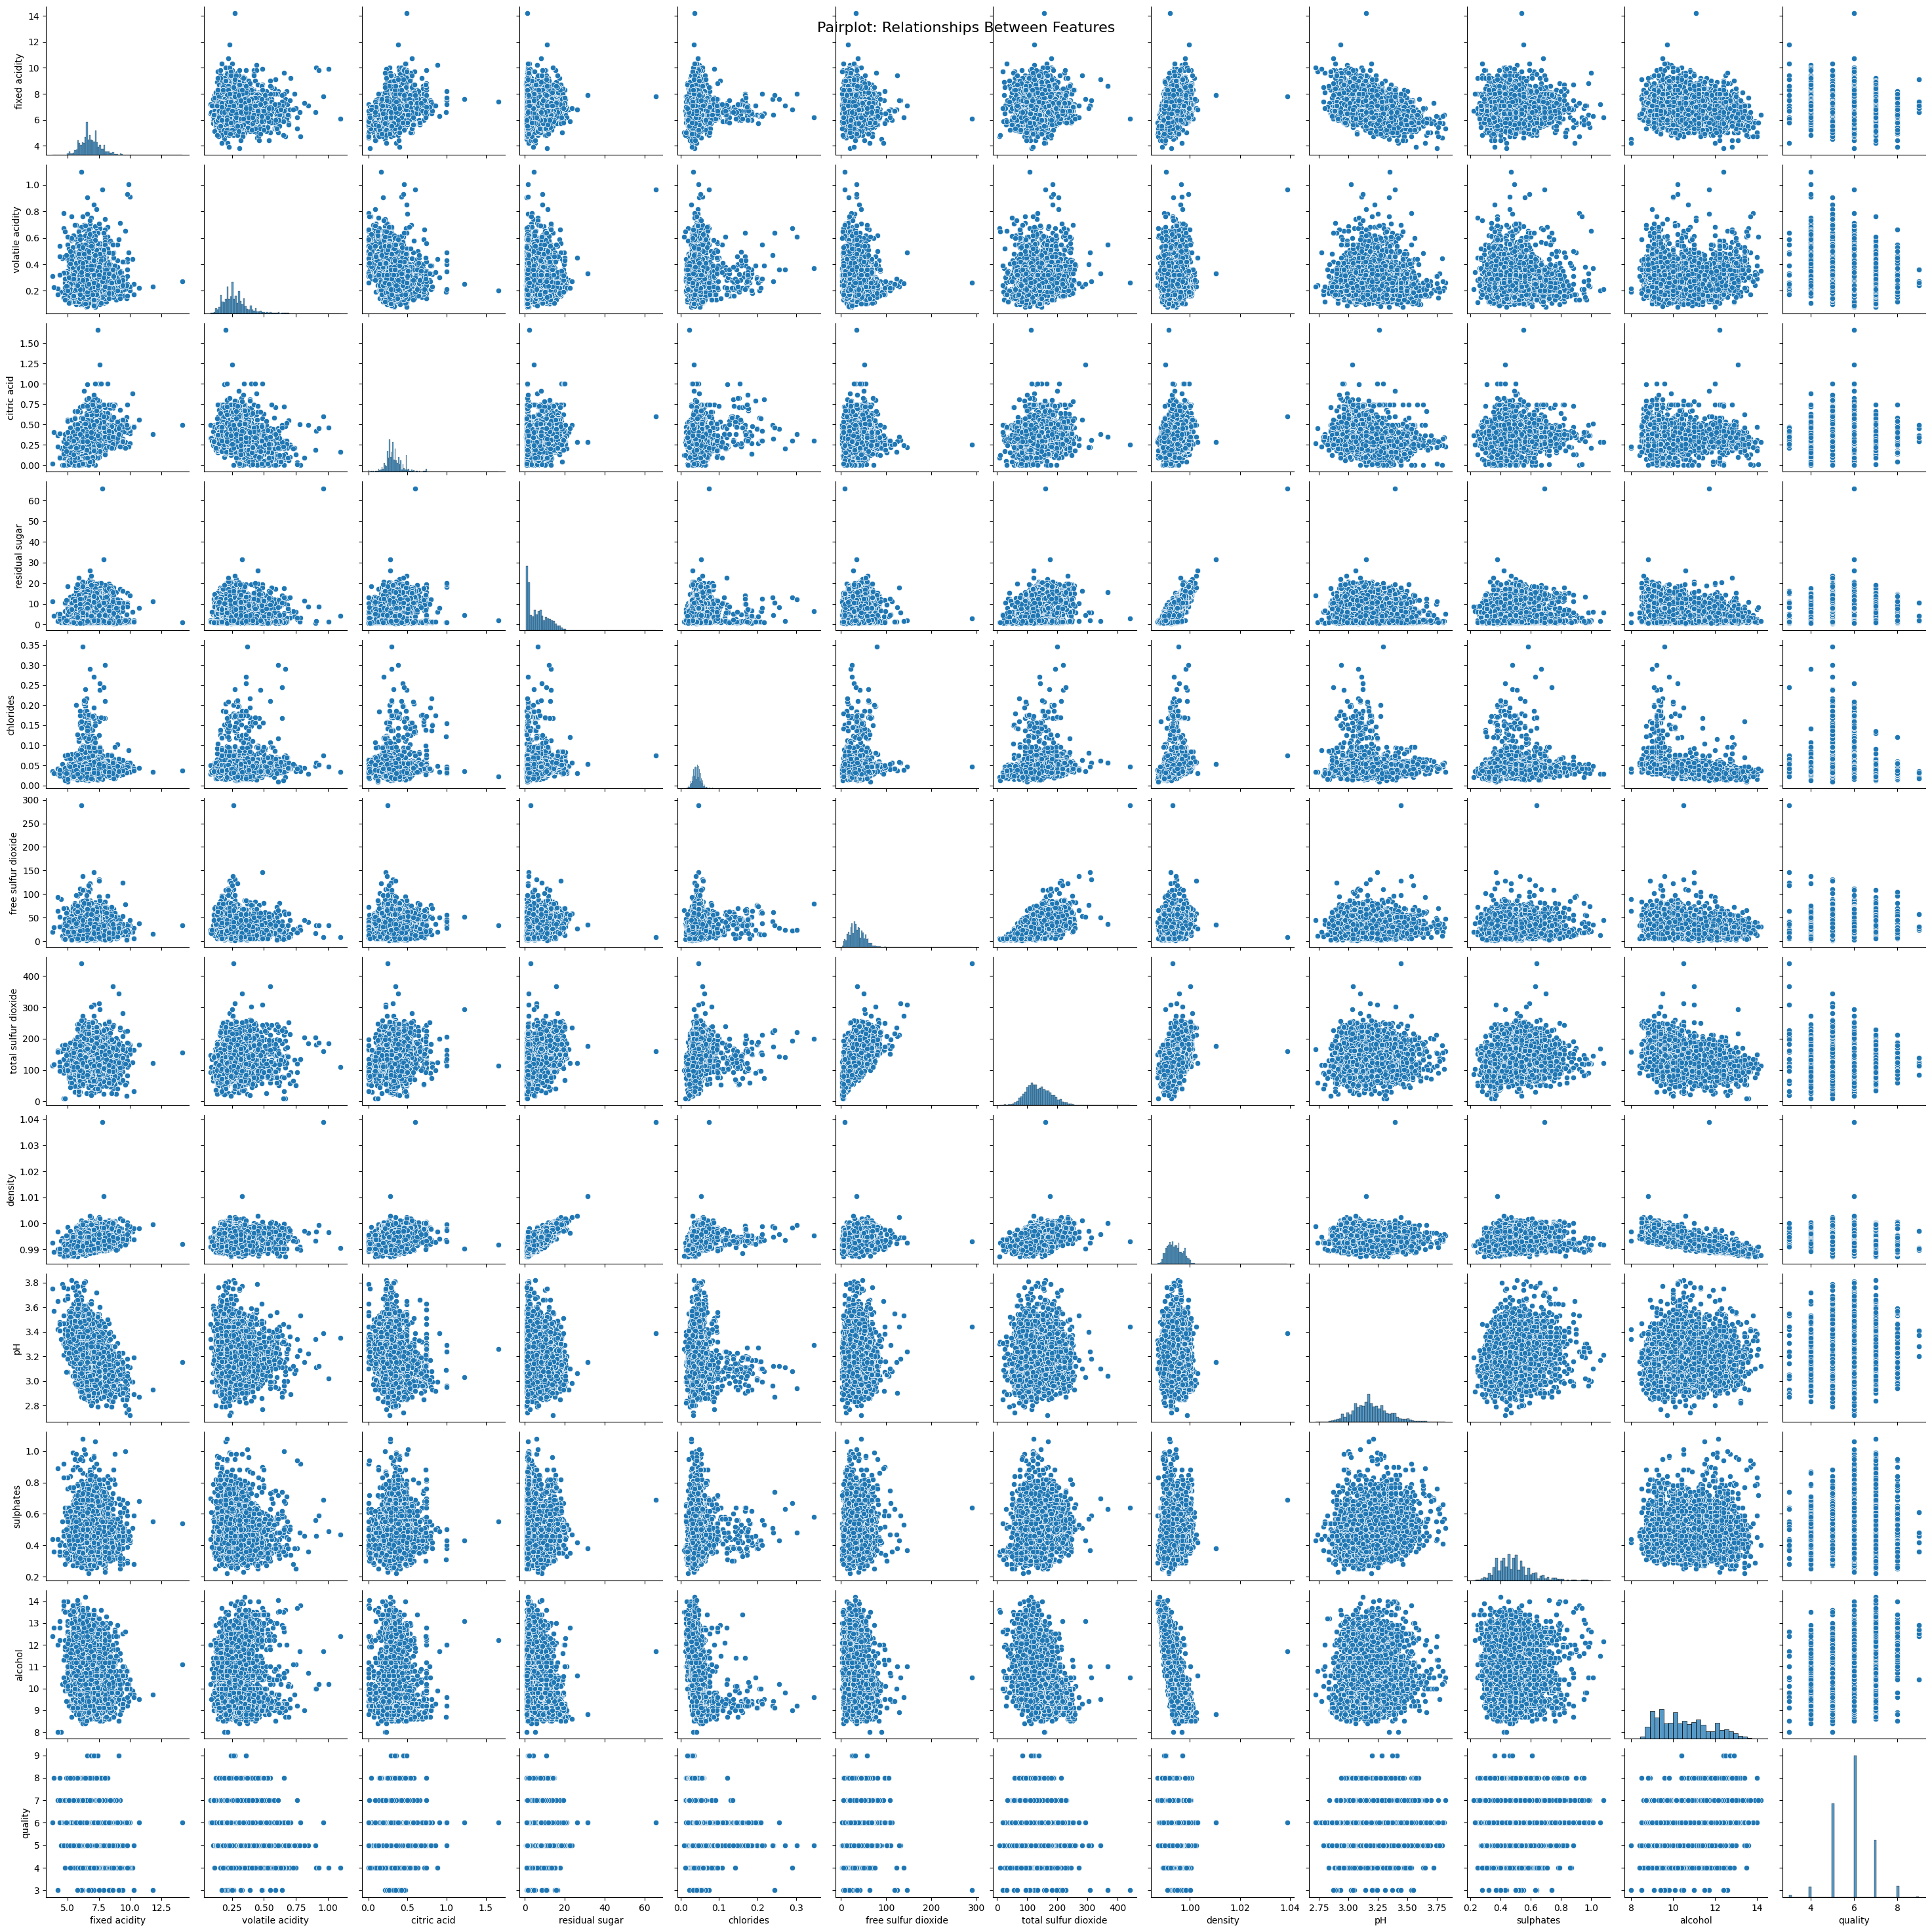

In [20]:
import seaborn as sns

# Pairplot to examine pairwise relationships
sns.pairplot(wine_data)
plt.suptitle('Pairplot: Relationships Between Features', fontsize=16)
plt.show()


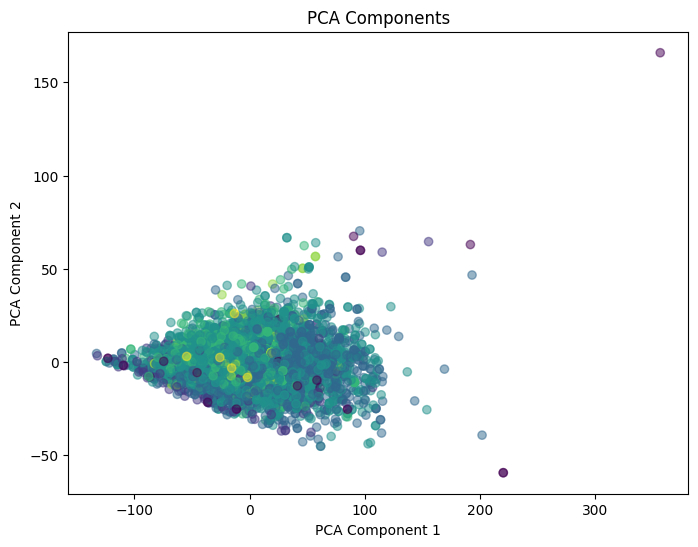

In [21]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(wine_data.drop(columns=['quality']))

# Plot PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5, c=wine_data['quality'], cmap='viridis')
plt.title('PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


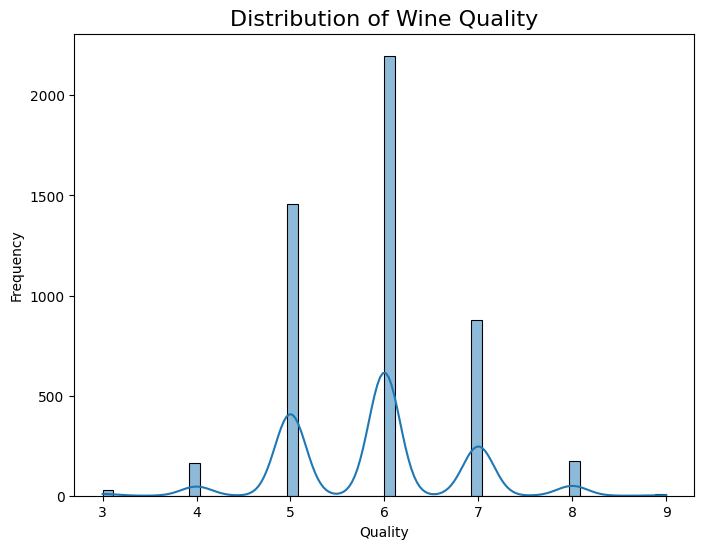

In [22]:
# Distribution of the quality variable
plt.figure(figsize=(8, 6))
sns.histplot(wine_data['quality'], kde=True)
plt.title('Distribution of Wine Quality', fontsize=16)
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()


quality
6    2198
5    1457
7     880
8     175
4     163
3      31
9      10
Name: count, dtype: int64


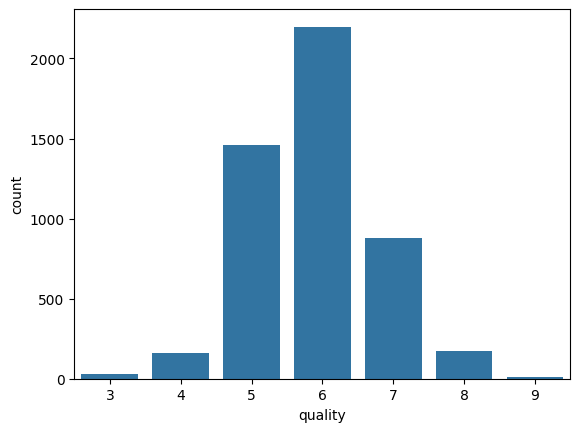

In [ ]:
# Checking class distribution (for classification problems)
print(wine_data['quality'].value_counts())
sns.countplot(x='quality', data=wine_data)
plt.show()
